# Import thư viện

In [1]:
import numpy as np
from datascience import * 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from datetime import datetime


In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats


| Họ và tên         | Tỷ lệ đóng góp (%) | Công việc chính                                                                 |
|-------------------|-------------------|--------------------------------------------------------------------------------|
| Nguyễn Văn Nhất  22028249  | 25%               | Tiền xử lý dữ liệu, phân tích thống kê mô tả, xây dựng các câu hỏi nghiên cứu  |
| Vương Nguyệt Bình 22028329    | 25%               | Phân tích dữ liệu bằng Table, kiểm định giả thuyết, trực quan hóa kết quả      |
| Đường Minh Hoàng  22028186 | 25%               | Lập trình mô phỏng bootstrap, kiểm định thống kê, viết báo cáo kết quả         |
| Phạm Đức Lâm 22028072             | 25%               | Phân tích sâu, kiểm định ý nghĩa thống kê, tổng hợp và trình bày báo cáo       |

# Phân tích tổng quan dữ liệu

## Đọc dữ liệu từ file

In [3]:
df = pd.read_csv('student_performance_large_dataset.csv')
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


## Phân tích các đặc điểm cơ bản của tập dữ liệu:

In [4]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_per_Week',
       'Preferred_Learning_Style', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade'],
      dtype='object')

In [5]:
def has_missing(array):
  '''Hàm kiểm tra xem 1 mảng có chứa giá trị null không'''
  for item in array:
      if item is None:
          return True
  return False

is_missing = make_array()
for col in df.columns:
  is_missing = np.append(is_missing, has_missing(col))

is_missing

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [6]:
print("Thống kê định lượng")
display(df.describe())



Thống kê định lượng


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [7]:
print("Phân bố giới tính")
display(df['Gender'].value_counts())


Phân bố giới tính


Gender
Female    4846
Male      4748
Other      406
Name: count, dtype: int64

In [8]:
print("Phong cách học tập")
display(df['Preferred_Learning_Style'].value_counts())

Phong cách học tập


Preferred_Learning_Style
Visual             2523
Kinesthetic        2513
Reading/Writing    2498
Auditory           2466
Name: count, dtype: int64

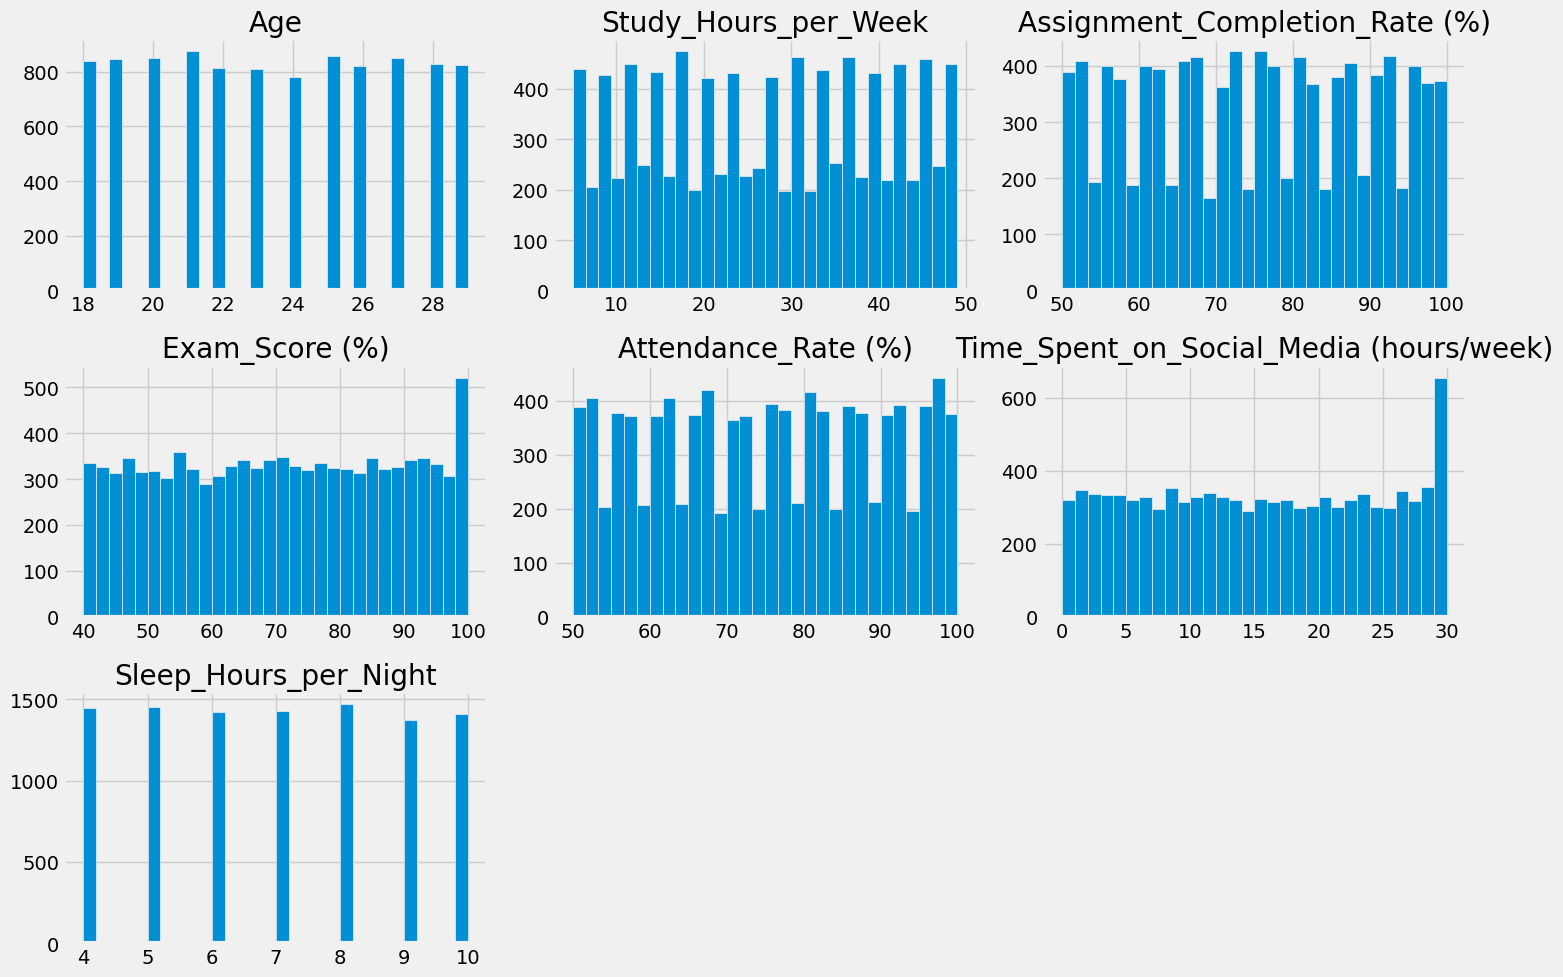

In [9]:
num_cols = ["Age", "Study_Hours_per_Week", "Assignment_Completion_Rate (%)", 
            "Exam_Score (%)", "Attendance_Rate (%)", "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"]

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

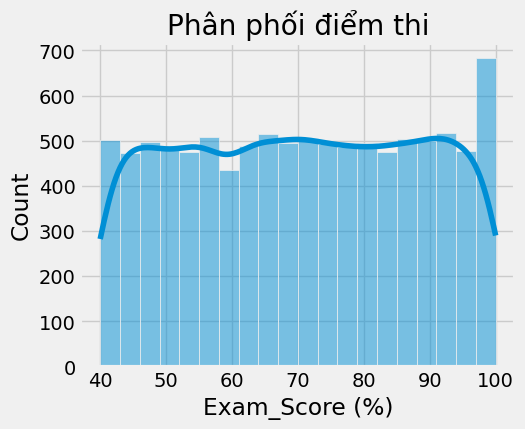

In [10]:
plt.figure(figsize=(5, 4))
sns.histplot(df['Exam_Score (%)'], bins=20, kde=True)
plt.title("Phân phối điểm thi")
plt.show()

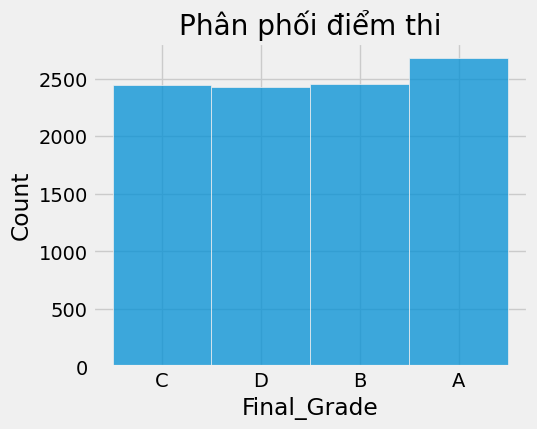

In [11]:
plt.figure(figsize=(5, 4))
sns.histplot(df['Final_Grade'])
plt.title("Phân phối điểm thi")
plt.show()

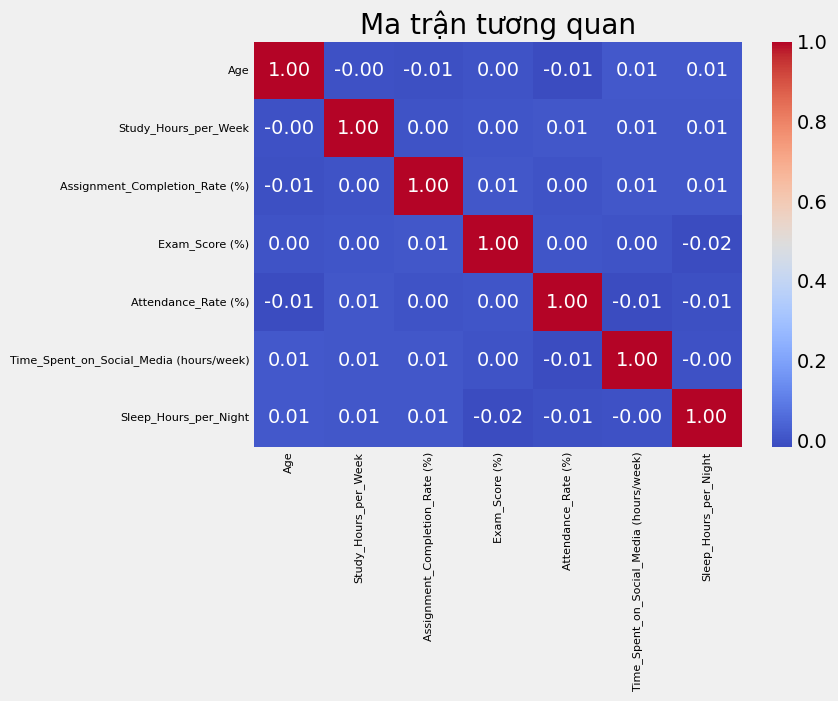

In [12]:
numeric_cols = ["Age", "Study_Hours_per_Week", "Assignment_Completion_Rate (%)", 
            "Exam_Score (%)", "Attendance_Rate (%)", "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"]
plt.figure(figsize=(7,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Ma trận tương quan")
plt.show()


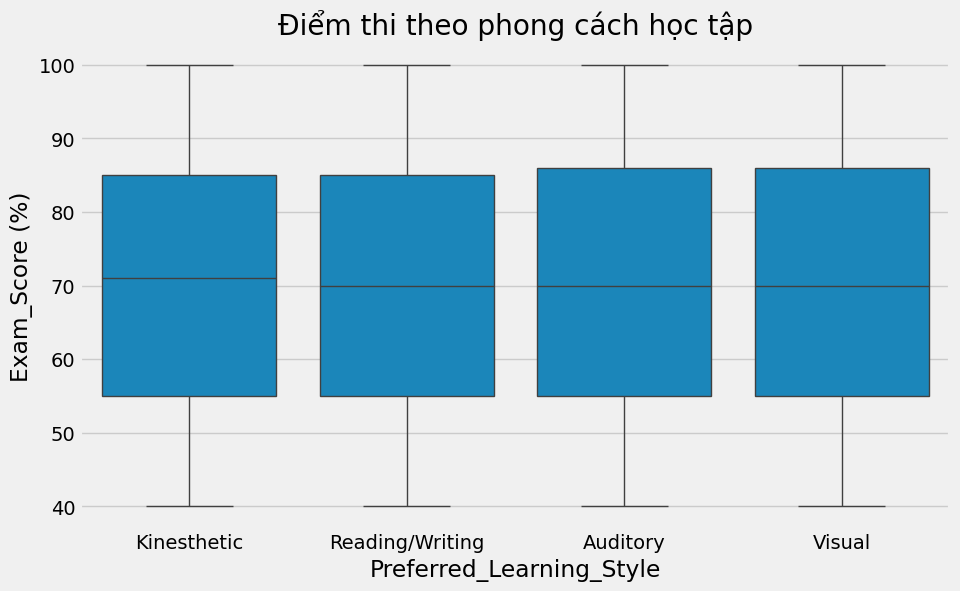

ANOVA p-value: 0.5458


In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Preferred_Learning_Style', y='Exam_Score (%)', data=df)
plt.title("Điểm thi theo phong cách học tập")
plt.show()

# Kiểm định ANOVA
groups = df['Preferred_Learning_Style'].unique()
group_data = [df[df['Preferred_Learning_Style'] == g]['Exam_Score (%)'] for g in groups]
f_stat, p_value = stats.f_oneway(*group_data)
print(f"ANOVA p-value: {p_value:.4f}")

Thống kê mô tả các biến định lượng:


,count,mean,std,min,25%,50%,75%,max
Study_Hours_per_Week,10000.0,27.1303,13.002547,5.0,16.0,27.0,38.0,49.0
Exam_Score (%),10000.0,70.1889,17.649447,40.0,55.0,70.0,85.0,100.0


Trung vị (median):


Study_Hours_per_Week    27.0
Exam_Score (%)          70.0
dtype: float64

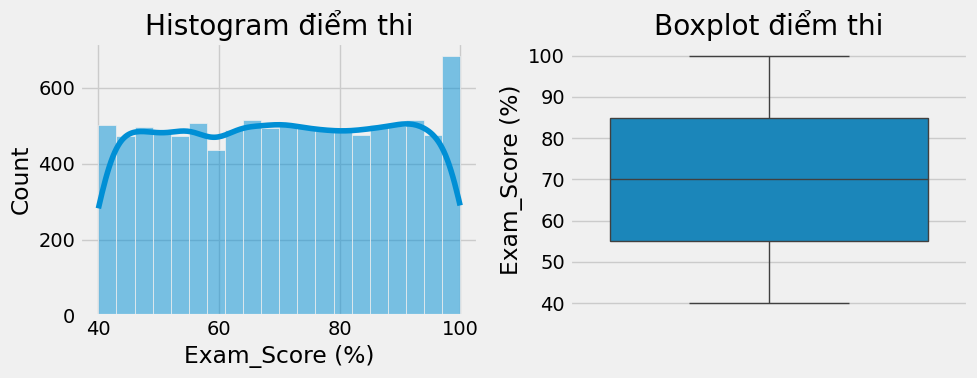

In [14]:
# Thống kê cơ bản cho các biến định lượng
quant_cols = ['Study_Hours_per_Week', 'Exam_Score (%)']
print("Thống kê mô tả các biến định lượng:")
display(df[quant_cols].describe().T)

print("Trung vị (median):")
display(df[quant_cols].median())


# Histogram và boxplot cho Exam_Score
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Exam_Score (%)'], bins=20, kde=True)
plt.title("Histogram điểm thi")

plt.subplot(1,2,2)
sns.boxplot(y=df['Exam_Score (%)'])
plt.title("Boxplot điểm thi")
plt.tight_layout()
plt.show()



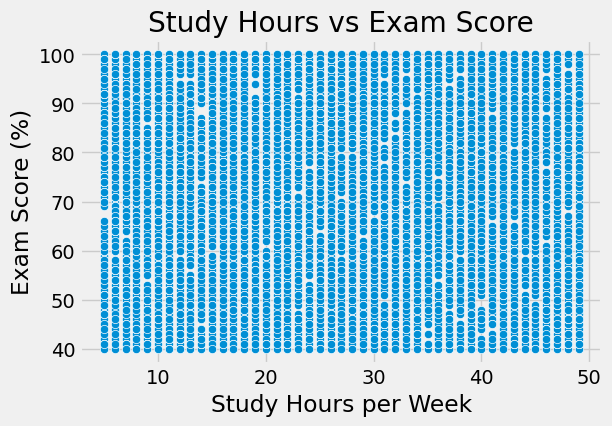

In [15]:
# Scatter plot giữa Study_Hours_per_Week và Exam_Score
plt.figure(figsize=(6,4))
sns.scatterplot(x='Study_Hours_per_Week', y='Exam_Score (%)', data=df)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Exam Score (%)")
plt.show()



In [16]:
df.head(5)

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


# Các câu hỏi nghiên cứu:

In [17]:
student_peformance_table = Table().read_table('student_performance_large_dataset.csv')
student_peformance_table.show(5)

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


## Nguyễn Văn Nhất - 22028249

### Câu hỏi 1: 
Học sinh hoàn thành hơn 10 khóa học trực tuyến (Online_Courses_Completed > 10) và có điểm thi (Exam_Score) trên 70% có khả năng đạt điểm cuối kỳ B cao hơn học sinh còn lại không ?

#### Lấy mẫu quan sát

In [18]:
sample_q1 = student_peformance_table.take(np.arange(100))
sample_q1.show(5)

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [19]:
# Nhóm 1: Học sinh >10 khóa học VÀ điểm thi >70%
group_target = sample_q1.where(
    'Online_Courses_Completed', are.above(10)
).where(
    'Exam_Score (%)', are.above(70)
)

# Nhóm 2: Tất cả học sinh còn lại
group_other = sample_q1.where(
    'Online_Courses_Completed', are.below_or_equal_to(10)
).where(
    'Exam_Score (%)', are.below_or_equal_to(70)
)

# Tính tỷ lệ đạt điểm A trong mỗi nhóm
p_target = np.mean(group_target.column('Final_Grade') == 'B')
p_other = np.mean(group_other.column('Final_Grade') == 'B')

print(f"Tỷ lệ đạt B - Nhóm mục tiêu: {p_target:.2%}")
print(f"Tỷ lệ đạt B - Nhóm khác: {p_other:.2%}")

Tỷ lệ đạt B - Nhóm mục tiêu: 45.00%
Tỷ lệ đạt B - Nhóm khác: 7.14%


In [20]:
observed_val_q1 = p_target - p_other
print(f"Giá trị quan sát được: {observed_val_q1:.2%}")

Giá trị quan sát được: 37.86%


In [21]:
num_repeats = 5000
simulation_results = make_array()
for i in np.arange(num_repeats):
    # Chọn ngẫu nhiên 100 học sinh từ bảng dữ liệu
    sample = student_peformance_table.sample(100)
    
    # Nhóm 1: Học sinh >15 khóa học VÀ điểm thi >80%
    group_target = sample.where(
        'Online_Courses_Completed', are.above(10)
    ).where(
        'Exam_Score (%)', are.above(70)
    )

    # Nhóm 2: Tất cả học sinh còn lại
    group_other = sample.where(
        'Online_Courses_Completed', are.below_or_equal_to(10)
    ).where(
        'Exam_Score (%)', are.below_or_equal_to(70)
    )

    # Tính tỷ lệ đạt điểm A trong mỗi nhóm
    p_target = np.mean(group_target.column('Final_Grade') == 'B')
    p_other = np.mean(group_other.column('Final_Grade') == 'B')

    # Tính giá trị quan sát được cho mỗi lần lặp
    simulation_results = np.append(simulation_results, p_target - p_other)   

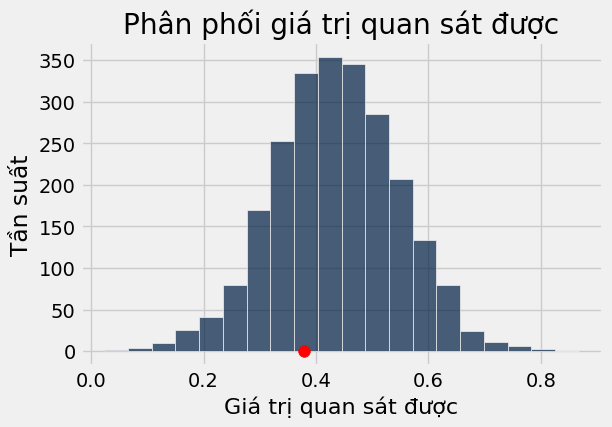

In [22]:
Table().with_column('Simulation Results', simulation_results).hist(bins=20)
plt.scatter(observed_val_q1, -0.002, color='red', s=70);
plt.title("Phân phối giá trị quan sát được")
plt.xlabel("Giá trị quan sát được")
plt.ylabel("Tần suất")
plt.show()

In [23]:
alpha = 0.05  # Mức ý nghĩa
p_value = np.count_nonzero(simulation_results >= observed_val_q1) / num_repeats
print(f"Giá trị p: {p_value:.4f}")
if p_value < alpha:
    print("Có bằng chứng thống kê để bác bỏ giả thuyết không.")
else:
    print("Không có bằng chứng thống kê để bác bỏ giả thuyết không.")    

Giá trị p: 0.7000
Không có bằng chứng thống kê để bác bỏ giả thuyết không.


#### Tính độ tương quan so với Final_Grade

In [24]:
grade_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1}
final_grade_int = make_array(*[grade_map[g] for g in student_peformance_table.column('Final_Grade')])
student_peformance_table = student_peformance_table.with_column('Final_Grade_Int', final_grade_int)
student_peformance_table.select('Final_Grade', 'Final_Grade_Int').show(5)

Final_Grade,Final_Grade_Int
C,2
D,1
D,1
B,3
C,2


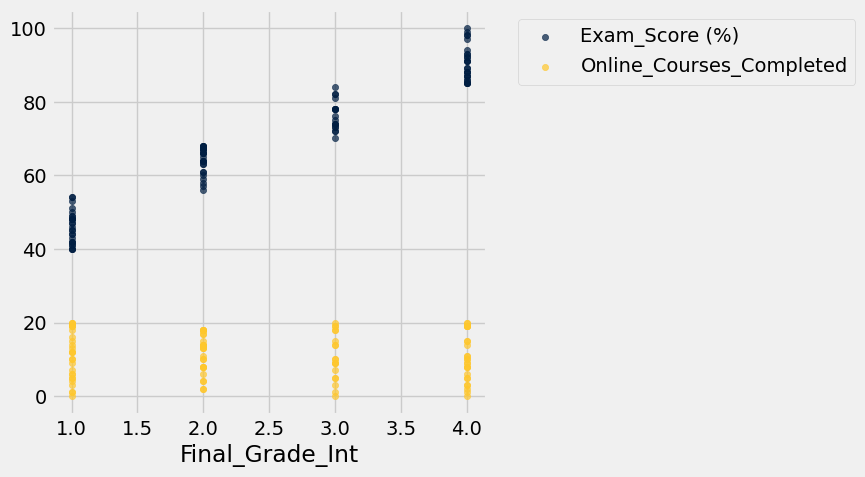

In [25]:
student_peformance_table.sample(100).select('Exam_Score (%)', 'Online_Courses_Completed','Final_Grade_Int').scatter('Final_Grade_Int')

In [26]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [27]:
s_e = student_peformance_table.sample(100).select('Exam_Score (%)', 'Final_Grade_Int')
s_e.show(5)

Exam_Score (%),Final_Grade_Int
59,2
61,2
66,2
85,4
49,1


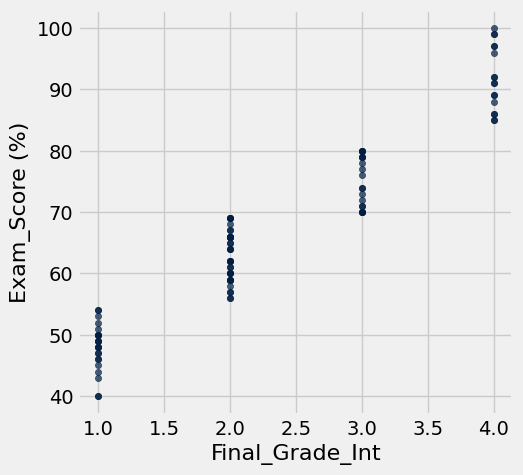

In [28]:
s_e.scatter('Final_Grade_Int', 'Exam_Score (%)')

In [29]:
correlation(s_e, 'Exam_Score (%)', 'Final_Grade_Int')

0.96116224184025612

### Câu hỏi 2: 
Học sinh ngủ dưới 6 giờ mỗi đêm (Sleep_Hours_per_Night < 6) và dành hơn 20 giờ/tuần trên mạng xã hội (Time_Spent_on_Social_Media > 20) có khả năng đạt điểm cuối kỳ dưới C cao hơn số còn lại không?

#### Lấy mẫu quan sát

In [30]:
sample_q2 = student_peformance_table.take(100)
sample_q2.show(5)

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Int
S00101,23,Female,11,Auditory,10,No,63,47,81,Yes,Low,0,4,D,1


In [31]:

# 2. Định nghĩa nhóm
group_risk = sample_q2.where('Sleep_Hours_per_Night', are.below(6))\
                       .where('Time_Spent_on_Social_Media (hours/week)', are.above(20))

group_normal = sample_q2.where('Sleep_Hours_per_Night', are.above_or_equal_to(6))\
                         .where('Time_Spent_on_Social_Media (hours/week)', are.below_or_equal_to(20))

# 3. Tính tỷ lệ điểm D/F
def calculate_fail_rate(group):
    grades = group.column('Final_Grade')
    return np.sum(np.isin(grades, ['D', 'F'])) / len(grades) if len(grades) > 0 else 0

p_risk = calculate_fail_rate(group_risk)
p_normal = calculate_fail_rate(group_normal)

print(f"Tỷ lệ điểm D/F - Nhóm nguy cơ: {p_risk:.1%} (n={group_risk.num_rows})")
print(f"Tỷ lệ điểm D/F - Nhóm bình thường: {p_normal:.1%} (n={group_normal.num_rows})")



Tỷ lệ điểm D/F - Nhóm nguy cơ: 0.0% (n=0)
Tỷ lệ điểm D/F - Nhóm bình thường: 0.0% (n=0)


In [32]:
observed_val_q2 = p_risk - p_normal
print(f"Giá trị quan sát được: {observed_val_q2:.1%}")

Giá trị quan sát được: 0.0%


In [33]:
simulation_results_q2 = make_array()
for i in np.arange(num_repeats):
    # Chọn ngẫu nhiên 100 học sinh từ bảng dữ liệu
    sample = student_peformance_table.sample(100)
    
    # Nhóm nguy cơ
    group_risk = sample.where('Sleep_Hours_per_Night', are.below(6))\
                       .where('Time_Spent_on_Social_Media (hours/week)', are.above(20))

    # Nhóm bình thường
    group_normal = sample.where('Sleep_Hours_per_Night', are.above_or_equal_to(6))\
                         .where('Time_Spent_on_Social_Media (hours/week)', are.below_or_equal_to(20))

    # Tính tỷ lệ điểm D/F trong mỗi nhóm
    p_risk = calculate_fail_rate(group_risk)
    p_normal = calculate_fail_rate(group_normal)

    # Tính giá trị quan sát được cho mỗi lần lặp
    simulation_results_q2 = np.append(simulation_results_q2, p_risk - p_normal)

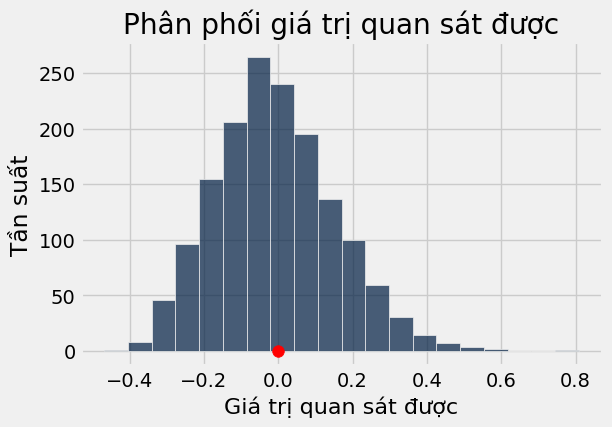

In [34]:
Table().with_column('Simulation Results', simulation_results_q2).hist(bins=20)
plt.scatter(observed_val_q2, -0.002, color='red', s=70);
plt.title("Phân phối giá trị quan sát được")
plt.xlabel("Giá trị quan sát được")
plt.ylabel("Tần suất")
plt.show()

In [35]:
p_value_q2 = np.count_nonzero(simulation_results_q2 >= observed_val_q2) / num_repeats
print(f"Giá trị p: {p_value_q2:.4f}")
if p_value_q2 < alpha:
    print("Có bằng chứng thống kê để bác bỏ giả thuyết không.")
else:
    print("Không có bằng chứng thống kê để bác bỏ giả thuyết không.")

Giá trị p: 0.4542
Không có bằng chứng thống kê để bác bỏ giả thuyết không.


## Vương Nguyệt Bình

### Câu hỏi 1:
Học sinh dành hơn 40 giờ học mỗi tuần (Study_Hours_per_Week > 40) có khả năng đạt điểm cuối kỳ từ B trở lên không?

Chọn thông tin cần thiết

In [36]:
data = student_peformance_table.select('Final_Grade', 'Study_Hours_per_Week')
data.show(5)

Final_Grade,Study_Hours_per_Week
C,48
D,30
D,47
B,13
C,24


Tạo cột nhị phân: B_or_higher = 1 nếu Final_Grade là A hoặc B, 0 nếu là C hoặc D

In [37]:
data = data.with_column('B_or_higher', data.apply(lambda g : 1 if g in ['A', 'B'] else 0, 'Final_Grade'))
data

Final_Grade,Study_Hours_per_Week,B_or_higher
C,48,0
D,30,0
D,47,0
B,13,1
C,24,0
D,26,0
D,49,0
C,14,0
B,45,1
C,35,0


Tạo cột nhóm: high_hours = 1 nếu Study_Hours_per_Week > 40, 0 nếu <= 40

In [38]:
data = data.with_column('high_hours', data.apply(lambda h : 1 if h > 40 else 0, 'Study_Hours_per_Week'))

In [39]:
# Nhóm học > 40 giờ
high_hours_group = data.where('high_hours', 1)
prop_high = np.mean(high_hours_group.column('B_or_higher'))
print(f"Tỷ lệ đạt B trở lên (học > 40 giờ): {prop_high: .2%}")

Tỷ lệ đạt B trở lên (học > 40 giờ):  51.79%


In [40]:
# Nhóm học ≤ 40 giờ
low_hours_group = data.where('high_hours', 0)
prop_low = np.mean(low_hours_group['B_or_higher'])
print(f"Tỷ lệ đạt B trở lên (học ≤ 40 giờ): {prop_low:.2%}")

Tỷ lệ đạt B trở lên (học ≤ 40 giờ): 51.21%


In [41]:
observed_diff = prop_high - prop_low
print(f"Chênh lệch tỷ lệ quan sát được: {observed_diff:.2%}")

Chênh lệch tỷ lệ quan sát được: 0.58%


In [42]:
# Mô phỏng phân phối chênh lệch tỷ lệ dưới H0
n_simulations = 100
diffs = make_array()

for i in range(n_simulations):
    # Xáo trộn nhãn high_hours
    shuffled_labels = data.sample(with_replacement=False)['high_hours']
    shuffled_data = data.with_column('shuffled_high_hours', shuffled_labels)
    
    # Tính tỷ lệ cho hai nhóm với nhãn xáo trộn
    shuffled_high = shuffled_data.where('shuffled_high_hours', 1)
    shuffled_low = shuffled_data.where('shuffled_high_hours', 0)
    prop_high_shuffled = np.mean(shuffled_high['B_or_higher'])
    prop_low_shuffled = np.mean(shuffled_low['B_or_higher'])
    
    # Lưu chênh lệch tỷ lệ
    diffs = np.append(diffs, prop_high_shuffled - prop_low_shuffled)

In [43]:
p_value = np.mean(diffs >= observed_diff)
print(f"P-value: {p_value:.4f}")

P-value: 0.3500


Trực quan hóa phân phối mô phỏng

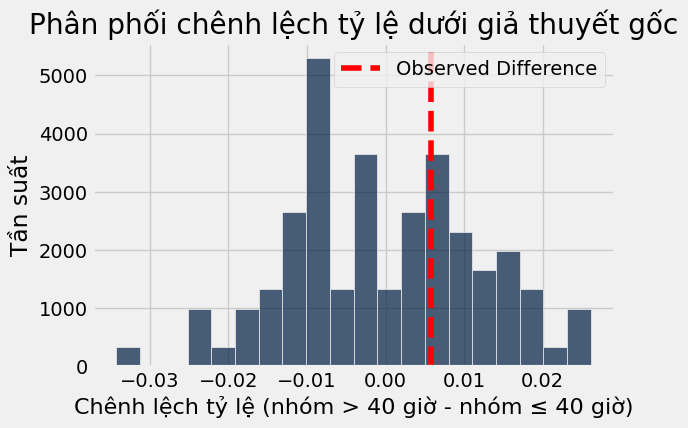

In [44]:
Table().with_column('Difference in Proportions', diffs).hist(bins=20)
plt.axvline(x=observed_diff, color='red', linestyle='--', label='Observed Difference')
plt.title('Phân phối chênh lệch tỷ lệ dưới giả thuyết gốc')
plt.xlabel('Chênh lệch tỷ lệ (nhóm > 40 giờ - nhóm ≤ 40 giờ)')
plt.ylabel('Tần suất')
plt.legend()
plt.show()

So sánh tỷ lệ bằng biểu đồ cột

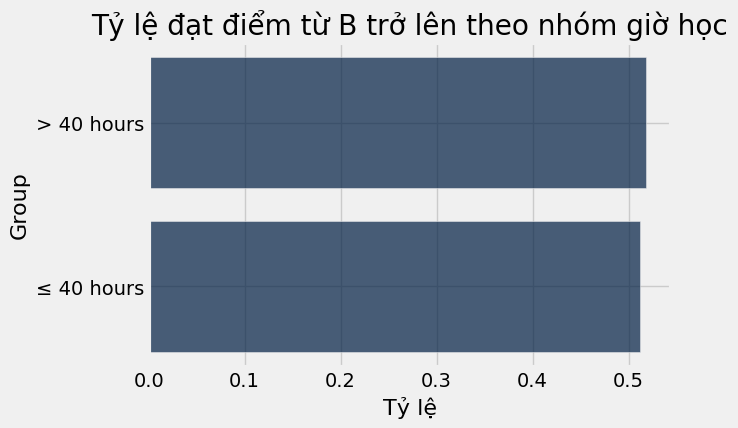

In [45]:
props = Table().with_columns(
    'Group', ['> 40 hours', '≤ 40 hours'],
    'Proportion B or Higher', [prop_high, prop_low]
)
props.barh('Group', 'Proportion B or Higher')
plt.title('Tỷ lệ đạt điểm từ B trở lên theo nhóm giờ học')
plt.xlabel('Tỷ lệ')
plt.show()

In [46]:
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết gốc (H₀). Học sinh học hơn 40 giờ mỗi tuần có tỷ lệ đạt điểm từ B trở lên cao hơn đáng kể.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết gốc (H₀). Không có sự khác biệt đáng kể về tỷ lệ đạt điểm từ B trở lên giữa hai nhóm.")
print(f"Kết luận: Tỷ lệ đạt B trở lên ở nhóm học > 40 giờ là {prop_high:.2%}, so với {prop_low:.2%} ở nhóm học ≤ 40 giờ.")

Không đủ bằng chứng để bác bỏ giả thuyết gốc (H₀). Không có sự khác biệt đáng kể về tỷ lệ đạt điểm từ B trở lên giữa hai nhóm.
Kết luận: Tỷ lệ đạt B trở lên ở nhóm học > 40 giờ là 51.79%, so với 51.21% ở nhóm học ≤ 40 giờ.


### Câu hỏi 2:

In [47]:
student_performance = student_peformance_table.with_column(
    'is_A',
    np.where(student_peformance_table.column('Final_Grade') == 'A', 1, 0)
)
student_performance

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Int,is_A
S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,2,0
S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,1,0
S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,1,0
S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,3,0
S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,2,0
S00006,28,Female,26,Kinesthetic,5,Yes,63,54,80,No,High,25,8,D,1,0
S00007,19,Female,49,Reading/Writing,13,Yes,91,44,66,Yes,Low,30,10,D,1,0
S00008,27,Male,14,Reading/Writing,5,Yes,88,56,76,Yes,Low,4,6,C,2,0
S00009,22,Male,45,Visual,16,No,52,78,70,No,Low,26,9,B,3,0
S00010,28,Other,35,Auditory,7,No,100,55,100,No,Medium,5,9,C,2,0


In [48]:
# Tạo cột nhị phân: meets_conditions = 1 nếu Assignment_Completion_Rate > 90% VÀ Participation_in_Discussions = 'Yes'
student_performance = student_performance.with_column(
    'meets_conditions',
    np.where(
        (student_performance.column('Assignment_Completion_Rate (%)') > 90) & 
        (student_performance.column('Participation_in_Discussions') == 'Yes'),
        1, 0
    )
)
student_performance

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Final_Grade_Int,is_A,meets_conditions
S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,2,0,1
S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,1,0,0
S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,1,0,0
S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,3,0,0
S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,2,0,0
S00006,28,Female,26,Kinesthetic,5,Yes,63,54,80,No,High,25,8,D,1,0,0
S00007,19,Female,49,Reading/Writing,13,Yes,91,44,66,Yes,Low,30,10,D,1,0,1
S00008,27,Male,14,Reading/Writing,5,Yes,88,56,76,Yes,Low,4,6,C,2,0,0
S00009,22,Male,45,Visual,16,No,52,78,70,No,Low,26,9,B,3,0,0
S00010,28,Other,35,Auditory,7,No,100,55,100,No,Medium,5,9,C,2,0,0


In [49]:
# Nhóm thỏa mãn cả hai điều kiện
meets_conditions_group = student_performance.where('meets_conditions', are.equal_to(1))
if meets_conditions_group.num_rows == 0:
    print("Không có học sinh nào thỏa mãn cả hai điều kiện. Kết thúc phân tích.")
    exit()
prop_meets = np.mean(meets_conditions_group.column('is_A'))
print(f"Tỷ lệ đạt A (thỏa mãn cả hai điều kiện): {prop_meets:.2%}")

Tỷ lệ đạt A (thỏa mãn cả hai điều kiện): 26.37%


In [50]:
# Nhóm không thỏa mãn cả hai điều kiện
not_meets_group = student_performance.where('meets_conditions', are.equal_to(0))
if not_meets_group.num_rows == 0:
    print("Không có học sinh nào không thỏa mãn cả hai điều kiện. Kết thúc phân tích.")
    exit()
prop_not_meets = np.mean(not_meets_group.column('is_A'))
print(f"Tỷ lệ đạt A (không thỏa mãn cả hai điều kiện): {prop_not_meets:.2%}")

Tỷ lệ đạt A (không thỏa mãn cả hai điều kiện): 26.84%


In [51]:
observed_diff = prop_meets - prop_not_meets
print(f"Chênh lệch tỷ lệ quan sát được: {observed_diff:.2%}")

Chênh lệch tỷ lệ quan sát được: -0.47%


In [52]:
# Mô phỏng phân phối chênh lệch tỷ lệ dưới giả thuyết gốc (H₀)
n_simulations = 100  # Số lần lặp tối ưu cho tốc độ và độ chính xác
diffs = make_array()

for i in range(n_simulations):
    # Xáo trộn nhãn meets_conditions
    shuffled_labels = student_performance.sample(with_replacement=False).column('meets_conditions')
    shuffled_data = student_performance.with_column('shuffled_conditions', shuffled_labels)
    
    # Tính tỷ lệ cho hai nhóm với nhãn xáo trộn
    shuffled_meets = shuffled_data.where('shuffled_conditions', are.equal_to(1))
    shuffled_not_meets = shuffled_data.where('shuffled_conditions', are.equal_to(0))
    prop_meets_shuffled = np.mean(shuffled_meets.column('is_A'))
    prop_not_meets_shuffled = np.mean(shuffled_not_meets.column('is_A'))
    
    # Lưu chênh lệch tỷ lệ
    diffs = np.append(diffs, prop_meets_shuffled - prop_not_meets_shuffled)

In [53]:
# Tính p-value (xác suất chênh lệch ≥ observed_diff)
p_value = np.mean(diffs >= observed_diff)
print(f"P-value: {p_value:.4f}")

P-value: 0.7000


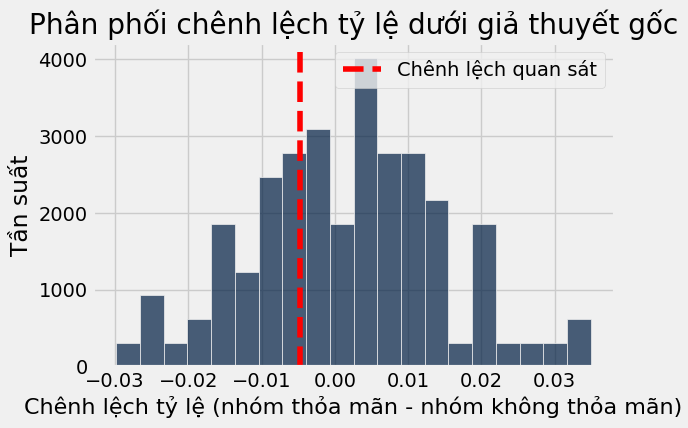

In [54]:
Table().with_column('Chênh lệch tỷ lệ', diffs).hist(bins=20)
plt.axvline(x=observed_diff, color='red', linestyle='--', label='Chênh lệch quan sát')
plt.title('Phân phối chênh lệch tỷ lệ dưới giả thuyết gốc')
plt.xlabel('Chênh lệch tỷ lệ (nhóm thỏa mãn - nhóm không thỏa mãn)')
plt.ylabel('Tần suất')
plt.legend()
plt.show()

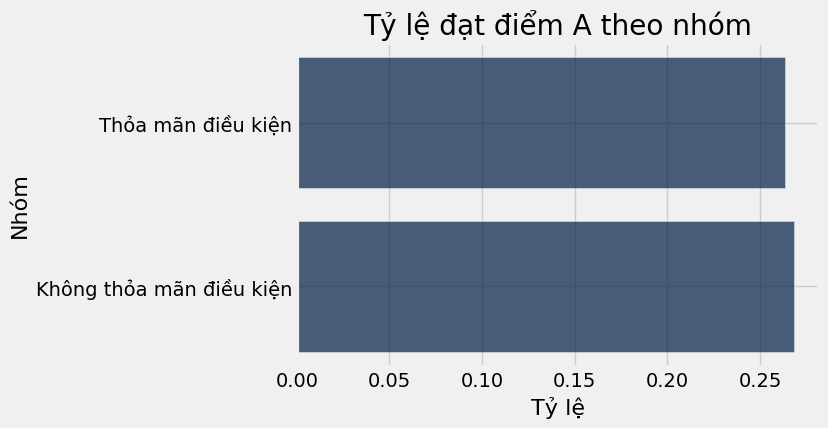

In [55]:
props = Table().with_columns(
    'Nhóm', ['Thỏa mãn điều kiện', 'Không thỏa mãn điều kiện'],
    'Tỷ lệ đạt A', [prop_meets, prop_not_meets]
)
props.barh('Nhóm', 'Tỷ lệ đạt A')
plt.title('Tỷ lệ đạt điểm A theo nhóm')
plt.xlabel('Tỷ lệ')
plt.show()

In [56]:
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết gốc (H₀). Học sinh có tỷ lệ hoàn thành bài tập trên 90% và tham gia thảo luận có xu hướng đạt điểm A cao hơn đáng kể.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết gốc (H₀). Không có sự khác biệt đáng kể về tỷ lệ đạt điểm A giữa hai nhóm.")
print(f"Kết luận: Tỷ lệ đạt A ở nhóm thỏa mãn cả hai điều kiện là {prop_meets:.2%}, so với {prop_not_meets:.2%} ở nhóm không thỏa mãn.")

Không đủ bằng chứng để bác bỏ giả thuyết gốc (H₀). Không có sự khác biệt đáng kể về tỷ lệ đạt điểm A giữa hai nhóm.
Kết luận: Tỷ lệ đạt A ở nhóm thỏa mãn cả hai điều kiện là 26.37%, so với 26.84% ở nhóm không thỏa mãn.


## Đường Minh Hoàng - 22028186

### Câu hỏi nghiên cứu 1:
Học sinh có điểm thi (Exam_Score) dưới 60% và tỷ lệ hoàn thành bài tập dưới 70%(Assignment_Completion_Rate < 70%) có xu hướng đạt điểm cuối kỳ D không?

Đầu tiên, ta chọn những cột thông tin cần thiết:

In [ ]:
student_performance_table = Table().read_table('student_performance_large_dataset.csv')
student_performance_table

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
S00006,28,Female,26,Kinesthetic,5,Yes,63,54,80,No,High,25,8,D
S00007,19,Female,49,Reading/Writing,13,Yes,91,44,66,Yes,Low,30,10,D
S00008,27,Male,14,Reading/Writing,5,Yes,88,56,76,Yes,Low,4,6,C
S00009,22,Male,45,Visual,16,No,52,78,70,No,Low,26,9,B
S00010,28,Other,35,Auditory,7,No,100,55,100,No,Medium,5,9,C


Lọc nhóm học sinh có Exam_Score < 60% và Assignment_Completion_Rate < 70%

In [ ]:
filtered_table = student_performance_table.where('Exam_Score (%)', are.below(60)).where('Assignment_Completion_Rate (%)', are.below(70))
filtered_table

Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
S00006,28,Female,26,Kinesthetic,5,Yes,63,54,80,No,High,25,8,D
S00031,20,Male,23,Kinesthetic,3,Yes,59,57,81,Yes,Medium,9,5,C
S00035,28,Female,32,Auditory,5,No,53,54,96,Yes,High,0,10,D
S00037,26,Female,26,Kinesthetic,3,Yes,53,48,76,No,Low,19,4,D
S00041,27,Male,41,Reading/Writing,14,No,65,56,74,Yes,Low,26,9,C
S00054,19,Male,47,Kinesthetic,2,No,52,44,84,Yes,Medium,11,10,D
S00059,29,Female,36,Reading/Writing,17,Yes,52,46,51,Yes,Low,27,7,D
S00067,24,Male,12,Kinesthetic,14,No,57,57,73,Yes,Medium,4,7,C
S00072,20,Female,46,Visual,13,No,55,45,52,No,Medium,7,7,D


Tiếp thep, ta tính tỉ lệ phần trăm học sinh trong nhóm này bị điểm D:


In [ ]:
num_filtered = filtered_table.num_rows
num_D_filtered = np.count_nonzero(filtered_table.column('Final_Grade') == 'D')
percentage_D_filtered = (num_D_filtered / num_filtered * 100) if num_filtered > 0 else 0
percentage_D_filtered

75.68843430369787

Sau đó, ta tính tỉ lệ phần trăm học sinh bị điểm D trong cả tập dữ liệu rồi so sánh hai số liệu này với nhau:

In [ ]:
num_total = student_performance_table.num_rows
num_D_total = np.count_nonzero(student_performance_table.column('Final_Grade') == 'D')
percentage_D_population = (num_D_total / num_total) * 100
percentage_D_population

24.27

Lọc nhóm học sinh có Exam_Score (%) từ 60% trở lên và Assignment_Completion_Rate (%) từ 70% trở lên để so sánh:

In [ ]:
condition = (student_performance_table.column('Exam_Score (%)') >= 60) | (student_performance_table.column('Assignment_Completion_Rate (%)') >= 70)
opposite_table = student_performance_table.where(condition)
num_opposite = opposite_table.num_rows
num_D_opposite = np.count_nonzero(opposite_table.column('Final_Grade') == 'D')
percentage_D_opposite = (num_D_opposite / num_opposite * 100) if num_opposite > 0 else 0
percentage_D_opposite

16.783136670867226

Học sinh có điểm thi dưới 60% và tỷ lệ hoàn thành bài tập dưới 70% có xu hướng mạnh mẽ đạt điểm cuối kỳ D, với tỷ lệ 75.69%, cao gấp hơn 4.5 lần so với nhóm đối lập (16.8%) và gấp hơn 3 lần so với trung bình toàn bộ tập dữ liệu (24.27%). Điều này cho thấy các yếu tố điểm thi thấp và tỷ lệ hoàn thành bài tập thấp là những chỉ số mạnh mẽ dự đoán điểm cuối kỳ D. Để cải thiện kết quả học tập, cần can thiệp hỗ trợ học sinh trong việc nâng cao điểm thi và hoàn thành bài tập đúng hạn.

### Câu hỏi nghiên cứu 2:
Học sinh có phong cách học tập ưa thích là 'Visual' (Preferred_Learning_Style = Visual) và dành ít hơn 15 giờ học mỗi tuần (Study_Hours_per_Week < 15) có xu hướng đạt điểm cuối kỳ dưới B không?


Ta lấy từ dataset ra những cột cần thiết:

In [ ]:
table_for_q2 = student_peformance_table.select('Preferred_Learning_Style', 'Study_Hours_per_Week', 'Final_Grade')
table_for_q2

Preferred_Learning_Style,Study_Hours_per_Week,Final_Grade
Kinesthetic,48,C
Reading/Writing,30,D
Kinesthetic,47,D
Auditory,13,B
Auditory,24,C
Kinesthetic,26,D
Reading/Writing,49,D
Reading/Writing,14,C
Visual,45,B
Auditory,35,C


Lọc nhóm học sinh có phong cách học 'Visual' và học dưới 15 giờ/tuần

In [ ]:
filtered_table_q2 = table_for_q2.where('Preferred_Learning_Style', are.equal_to('Visual')).where('Study_Hours_per_Week', are.below(15))
filtered_table_q2

Preferred_Learning_Style,Study_Hours_per_Week,Final_Grade
Visual,14,C
Visual,11,A
Visual,6,A
Visual,11,B
Visual,12,C
Visual,6,A
Visual,5,C
Visual,11,B
Visual,9,B
Visual,12,B


Tính tỷ lệ học sinh đạt điểm dưới B trong nhóm đã lọc

In [ ]:
percentage_below_B_filtered = np.count_nonzero(np.isin(filtered_table_q2.column('Final_Grade'), ['C', 'D'])) / filtered_table_q2.num_rows * 100
percentage_below_B_filtered

49.74271012006861

So sánh với nhóm đối lập

In [ ]:
opposite_group = table_for_q2.where('Preferred_Learning_Style', are.not_equal_to('Visual')).where('Study_Hours_per_Week', are.above_or_equal_to(15))
percentage_below_B_opposite = np.count_nonzero(np.isin(opposite_group.column('Final_Grade'), ['C', 'D'])) / opposite_group.num_rows * 100
percentage_below_B_opposite

48.832054560954816

Học sinh có phong cách học tập 'Visual' và học dưới 15 giờ/tuần có xu hướng đạt điểm cuối kỳ dưới B (C hoặc D) với tỷ lệ 53.81%, cao hơn so với toàn bộ tập dữ liệu (49.74%) và nhóm không phải Visual hoặc học từ 15 giờ/tuần (48.83%).

## Phạm Đức Lâm

### Câu hỏi nghiên cứu 1:
Học sinh dành hơn 25 giờ/tuần trên mạng xã hội (Time_Spent_on_Social_Media > 25) và ngủ dưới 7 giờ mỗi đêm (Sleep_Hours_per_Night < 7) có khả năng đạt điểm cuối kỳ dưới trung bình của tập dữ liệu không?

Đầu tiên, ta chọn những cột thông tin cần thiết:

In [60]:
table_for_q2 = student_peformance_table.select('Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night', 'Exam_Score (%)')
table_for_q2

Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Exam_Score (%)
9,8,69
28,8,40
13,7,43
24,10,70
26,8,63
25,8,54
30,10,44
4,6,56
26,9,78
5,9,55


Ta sẽ lọc ra nhóm các học sinh dành hơn 25 giờ/tuần trên mạng xã hội (Time_Spent_on_Social_Media > 25) và ngủ dưới 7 giờ mỗi đêm (Sleep_Hours_per_Night < 7)

In [61]:
filtered_table = table_for_q2.where('Time_Spent_on_Social_Media (hours/week)', are.above(25)).where('Sleep_Hours_per_Night', are.below(7))
filtered_table

Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Exam_Score (%)
27,6,60
30,6,69
28,4,55
27,6,47
26,5,92
26,4,43
26,5,71
28,6,42
27,6,45
30,5,48


Ta sẽ tính điểm trung bình của nhóm học sinh này và của cả tập học sinh:


In [62]:
population_mean_grade = np.mean(table_for_q2.column('Exam_Score (%)'))
filtered_mean_grade = np.mean(filtered_table.column('Exam_Score (%)'))

population_mean_grade, filtered_mean_grade

(70.188900000000004, 70.392235609103082)

Như vậy, có vẻ như điểm trung bình của nhóm học sinh dành hơn 25 giờ/tuần trên mạng xã hội (Time_Spent_on_Social_Media > 25) và ngủ dưới 7 giờ mỗi đêm (Sleep_Hours_per_Night < 7) và tất cả học sinh trong tập dữ liệu là gần như ngang nhau, thậm chí nhóm này còn cao hơn một chút

Ta sẽ sử dụng Bootstrap để kiểm tra thống kê, thống kê được chọn sử dụng sẽ là điểm trung bình của sample có size bằng với số học sinh dành hơn 25 giờ/tuần trên mạng xã hội (Time_Spent_on_Social_Media > 25) và ngủ dưới 7 giờ mỗi đêm (Sleep_Hours_per_Night < 7)

In [63]:
n_bootstrap = 5000
bootstrap_means = make_array()

n_filtered = filtered_table.num_rows

# Lấy mẫu ngẫu nhiên và tính trung bình
for i in range(n_bootstrap):
    sample = student_peformance_table.sample(n_filtered)
    one_mean = np.mean(sample.column('Exam_Score (%)'))
    bootstrap_means = np.append(bootstrap_means, one_mean)
bootstrap_means

array([ 70.31191432,  70.95448461,  69.89558233, ...,  70.11780455,
        70.01740295,  71.01338688])

Ta tạo histogram từ bootstrap_means

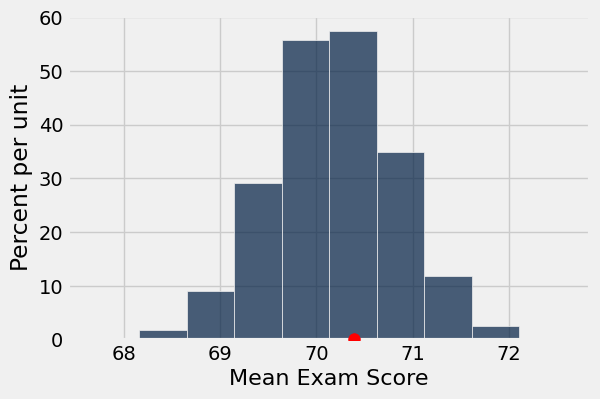

In [64]:
Table().with_column('Mean Exam Score', bootstrap_means).hist()
plt.scatter(filtered_mean_grade, 0.001, color='red', s=70, zorder=3)
plt.show()

Tính p-value:

In [65]:
p_value = np.count_nonzero(bootstrap_means <= filtered_mean_grade) / n_bootstrap
p_value

0.634

Với mức cutoff 5%, ta kết luận rằng nhóm học sinh dành hơn 25 giờ/tuần trên mạng xã hội và ngủ dưới 7 giờ/đêm có điểm số trung bình giống với population.

### Câu hỏi nghiên cứu 2:
Học sinh không tham gia thảo luận (Participation_in_Discussions = No) và có tỷ lệ tham gia lớp học dưới 70% (Attendance_Rate < 70%) có xu hướng đạt điểm cuối kỳ D không?


Ta lấy từ dataset ra những cột cần thiết:

In [66]:
table_for_q1 = student_peformance_table.select('Participation_in_Discussions', 'Attendance_Rate (%)', 'Final_Grade')
table_for_q1

Participation_in_Discussions,Attendance_Rate (%),Final_Grade
Yes,66,C
No,57,D
No,79,D
Yes,60,B
Yes,93,C
Yes,80,D
Yes,66,D
Yes,76,C
No,70,B
No,100,C


Lọc ra những học sinh không tham gia thảo luận và có tỉ lệ tham gia lớp học dưới 70%:

In [67]:
filtered_table_1 = table_for_q1.where('Participation_in_Discussions', 'No').where('Attendance_Rate (%)', are.below(70))
filtered_table_1

Participation_in_Discussions,Attendance_Rate (%),Final_Grade
No,57,D
No,51,C
No,54,A
No,58,D
No,65,D
No,60,C
No,52,D
No,68,A
No,57,D
No,61,C


Tiếp thep, ta tính tỉ lệ phần trăm học sinh trong nhóm này bị điểm D:

In [68]:
percentage_D_filtered = np.count_nonzero(filtered_table_1.column('Final_Grade') == 'D') / filtered_table_1.num_rows * 100
percentage_D_filtered

25.94249201277955

Sau đó, ta tính tỉ lệ phần trăm học sinh bị điểm D trong cả tập dữ liệu rồi so sánh hai số liệu này với nhau:

In [69]:
percentage_D_population = np.count_nonzero(table_for_q1.column('Final_Grade') == 'D') / table_for_q1.num_rows * 100
percentage_D_population

24.27

Có thể thấy, hai chỉ số này không khác biệt nhau là mấy. Để thêm chắc chắn, ta tính thêm tỉ lệ phần trăm bị điểm D của nhóm học sinh có tham gia thảo luận và có tỉ lệ tham gia lớp học trên 70%

In [70]:
discussed_and_attended = table_for_q1.where('Participation_in_Discussions', 'Yes').where('Attendance_Rate (%)', are.above(70))
discussed_and_attended

Participation_in_Discussions,Attendance_Rate (%),Final_Grade
Yes,93,C
Yes,80,D
Yes,76,C
Yes,74,C
Yes,76,A
Yes,93,A
Yes,90,A
Yes,82,B
Yes,73,B
Yes,100,A


In [71]:
percentage_D_discussed_and_attended = np.count_nonzero(discussed_and_attended.column('Final_Grade') == 'D') / discussed_and_attended.num_rows * 100
percentage_D_discussed_and_attended

25.106624964458348

Ta có thể thấy, 3 nhóm đều có tỉ lệ điểm D ngang nhau. Nhóm không tham gia thảo luận và có tỉ lệ tham gia lớp học dưới 70% chỉ có tỉ lệ bị D cao hơn một chút so với nhóm có tham gia thảo luận và tham gia lớp học trên 70%.

Như vậy, ta không thể kết luận học sinh không tham gia thảo luận (Participation_in_Discussions = No) và có tỷ lệ tham gia lớp học dưới 70% (Attendance_Rate < 70%) không có xu hướng đạt điểm D.